In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# This DS is collected  from power consumption of three different distribution networks of Tetouan in  Morocco.
# The DS is multivariate time series data.
# Source of the DS : https://archive.ics.uci.edu/dataset/849/power+consumption+of+tetouan+city

In [4]:
df = pd.read_csv('Tetuan City power consumption.csv')
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [5]:
df.shape

(52416, 9)

In [6]:
df.info()
# The good thing is there all columns are numerical except the date column.
# So I don't have to do any encoding.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [7]:
# let's check for duplicated values
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()
# It seems there are some columns have skewed distribution.

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [9]:
# I nned to fix the columns name to remove the spaces
df.columns = df.columns.str.replace(' ', '_')
df.head()

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [10]:
df.tail()
# This is one year data 

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [11]:
# Let's convert the date column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime']) 
df = df.sort_values('DateTime').set_index('DateTime')

In [12]:
df.head()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [13]:
# let's see the time range
print(df.index.min(), df.index.max())
# almost one year data, but last day of year is missed

2017-01-01 00:00:00 2017-12-30 23:50:00


In [14]:
print("duplicate in Datetime:",df.index.duplicated().sum())

duplicate in Datetime: 0


In [15]:
# let's find gap in the time series
Gap_time = df.index.to_series().diff()
print("\n Time gaps:")
print(Gap_time)
# There is not gap in time series range. since diff function calculates the difference between current columns and previous one.
# that is why fist date time is NaT
# Overall the DS is a decent, no duplicate and no gap in time series


 Time gaps:
DateTime
2017-01-01 00:00:00               NaT
2017-01-01 00:10:00   0 days 00:10:00
2017-01-01 00:20:00   0 days 00:10:00
2017-01-01 00:30:00   0 days 00:10:00
2017-01-01 00:40:00   0 days 00:10:00
                            ...      
2017-12-30 23:10:00   0 days 00:10:00
2017-12-30 23:20:00   0 days 00:10:00
2017-12-30 23:30:00   0 days 00:10:00
2017-12-30 23:40:00   0 days 00:10:00
2017-12-30 23:50:00   0 days 00:10:00
Name: DateTime, Length: 52416, dtype: timedelta64[ns]


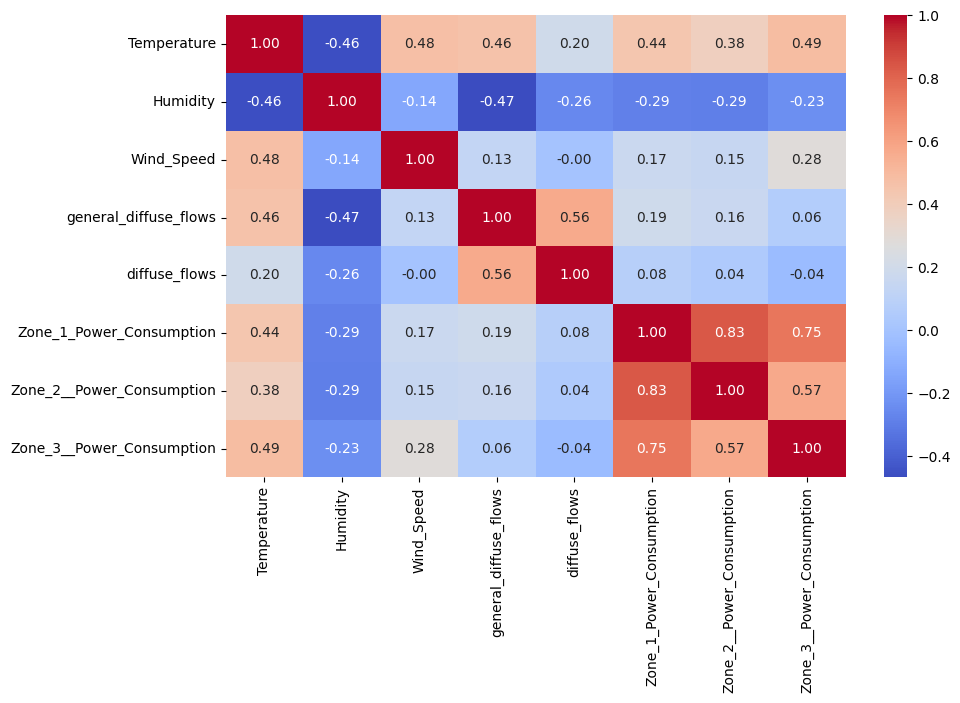

In [16]:
# Let's visualize the coorrelation between the columns
numeric_columns = df.select_dtypes(include=[np.number])
corr = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()
# Zone1 ,2 and 3 are strongly correlated.
# HUmidity and Temperature have inverse connection.
# Temperature has positive correlation with the power consumption in all zones, which is expected.
# When humidity goes up the consumption and temperature goes down,  this is also expected.

In [17]:
# Resampling the data to hourly.
# full of a year is 8760 hours, so after resampling the DS should have 8760 rows

# But there is a question, hourly mean or sum?:
# I tested both in different notebook,  for Zone1: mean=29197.9747 and  sum=175187.8481
# If you divide sum by 6 that gives the mean. 
# For now I will go with mean.
df_hourly = df.resample("h").mean(numeric_only=True).reset_index()
df_hourly.shape
# Only 24 hours is missed, that is the last day of the year.

(8736, 9)

In [18]:
df_hourly.shape

(8736, 9)

In [19]:
df_hourly.head()

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
0,2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
1,2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2,2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
3,2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
4,2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433


In [20]:
df_hourly.describe()

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
count,8736,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000
mean,2017-07-01 23:30:00,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
min,2017-01-01 00:00:00,3.602167,12.710000,0.054667,0.019000,0.040000,14329.113923,8685.947047,6190.636254
25%,2017-04-01 23:45:00,14.403750,58.324583,0.078167,0.064000,0.124167,26292.951730,17016.901716,13148.470246
50%,2017-07-01 23:30:00,18.759167,69.815833,0.085500,9.947417,8.241250,32342.303347,20787.229493,16427.659642
75%,2017-09-30 23:15:00,22.866667,81.350000,4.915333,326.487500,105.883333,37318.002218,24677.609019,21598.447824
max,2017-12-30 23:00:00,39.695000,94.750000,5.933667,953.350000,861.000000,51844.261932,36254.699050,47223.765690
std,NaN,5.807624,15.475739,2.340551,260.820277,119.691920,7068.919876,5165.178202,6591.013989


In [21]:
# I compared the desbribe() output before and after resampling, the mean row is almost same.

In [22]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   8736 non-null   datetime64[ns]
 1   Temperature                8736 non-null   float64       
 2   Humidity                   8736 non-null   float64       
 3   Wind_Speed                 8736 non-null   float64       
 4   general_diffuse_flows      8736 non-null   float64       
 5   diffuse_flows              8736 non-null   float64       
 6   Zone_1_Power_Consumption   8736 non-null   float64       
 7   Zone_2__Power_Consumption  8736 non-null   float64       
 8   Zone_3__Power_Consumption  8736 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 614.4 KB


In [23]:
df_hourly.head()

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
0,2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
1,2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2,2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
3,2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
4,2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433


In [24]:
# Change the target columns's name 
df_hourly.rename(columns={'Zone_1_Power_Consumption': 'zone_one','Zone_2__Power_Consumption': 'zone_two',  'Zone_3__Power_Consumption': 'zone_three'}, inplace=True)

In [25]:
# Extracting time columns and doing cyclical encoding:
# extract hour, days, month, is_weekend

df_hourly= df_hourly.set_index('DateTime')
df_hourly["hour"]= df_hourly.index.hour
# days of week, monday=0, sunday=6
#df_hourly["days"]= df_hourly.index.dayofweek
df_hourly["month"]= df_hourly.index.month-1   
# df_hourly["is_weekend"] =(df_hourly["days"]>= 5).astype(int)


# Cyclical encoding 
df_hourly["hour_sin"] = np.sin(2*np.pi*df_hourly["hour"]/24)
df_hourly["hour_cos"]= np.cos(2*np.pi*df_hourly["hour"]/24)
#df_hourly["days_sin"]= np.sin(2*np.pi*df_hourly["days"]/7)
#df_hourly["days_cos"]= np.cos(2*np.pi*df_hourly["days"]/7)
df_hourly["month_sin"]= np.sin(2*np.pi*df_hourly["month"]/12)
df_hourly["month_cos"] =np.cos(2*np.pi*df_hourly["month"]/12)

# Source: https://mlpills.substack.com/p/issue-89-encoding-cyclical-features?

In [26]:
#  let's find the connection between time features and zones 
time_columns = ["hour_sin","hour_cos","month_sin","month_cos"]
zones = ["zone_one","zone_two","zone_three"]

"""
time_columns = ["is_weekend","hour_sin","hour_cos","days_sin","days_cos","month_sin","month_cos"]
zones = ["zone_one","zone_two","zone_three"]
"""

correlation = df_hourly[time_columns + zones].corr()
print(correlation.loc[time_columns, zones].round(2))

# hour has strong correlation with all zones. 
# the days and  weekend have weak connection with zones.
# month has connection with zones, especially zone_three

# Moraco is a muslin country, weekend might be friday, I guess.

           zone_one  zone_two  zone_three
hour_sin      -0.76     -0.70       -0.51
hour_cos      -0.04     -0.07        0.20
month_sin     -0.01     -0.29        0.22
month_cos     -0.29     -0.15       -0.47


In [27]:
df_hourly = df_hourly.drop(columns=["hour","month"])

In [30]:
df_hourly.head()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,zone_one,zone_two,zone_three,hour_sin,hour_cos,month_sin,month_cos
DateTime,,,,,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193,0.000000,1.000000,0.0,1.0
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567,0.258819,0.965926,0.0,1.0
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578,0.500000,0.866025,0.0,1.0
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422,0.707107,0.707107,0.0,1.0
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433,0.866025,0.500000,0.0,1.0


In [29]:
# Save the preprocessed data
df_hourly.to_csv('preprocessed_hourly.csv', index=True)